In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from wordle import *
from tqdm import tqdm

# comparing "AEROS", "SOARE", "AROSE"

In [4]:
m = []
guess = 'soare'

for guess in ['aeros', 'soare', 'arose']:
    m.append([])
    for answer in tqdm(all_words):
        pws = test_guess(all_words, answer, guess)
        l = len(pws)

        m[-1].append(l)

100%|██████████| 12972/12972 [00:20<00:00, 619.14it/s]


In [5]:
print(*[max(a) for a in m])
print(*[min(a) for a in m])
print(*[sum(a)/len(a) for a in m])

801 769 867
1 1 1
309.73342584027137 303.8308664816528 382.0536540240518


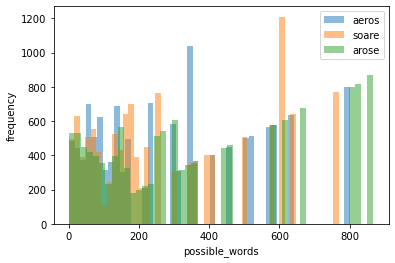

In [6]:
plt.hist(m[0], label='aeros', bins=50, alpha=0.5)
plt.hist(m[1], label='soare', bins=50, alpha=0.5)
plt.hist(m[2], label='arose', bins=50, alpha=0.5)

plt.xlabel('possible_words')
plt.ylabel('frequency')
plt.legend()

# Getting Optimal Guess

### SOARE-UNTIL-DUMPY start (Heeyoung's idea)

In [39]:
m2 = []

for answer in tqdm(all_words):
    pw = test_guess(all_words, answer, 'soare')
    pw = test_guess(pw, answer, 'until')
    pw = test_guess(pw, answer, 'dumpy')
    
    c = 3
    
    while len(pw) != 1:
        c += 1
        optimal_guess = get_optimal_guess(pw)
        pw = test_guess(pw, answer, optimal_guess)

    m2.append(c)

100%|██████████| 12972/12972 [00:33<00:00, 384.58it/s]


In [40]:
print(max(m2))
print(min(m2))
print(sum(m2)/len(m2))

11
3
4.10800185013876


Text(0, 0.5, 'frequency')

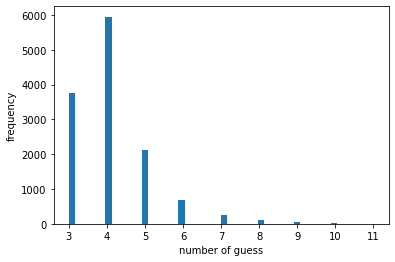

In [41]:
plt.hist(m2, bins=50)
plt.xlabel('number of guess')
plt.ylabel('frequency')

In [44]:
qualified = [i for i in m2 if i < 7]

len(qualified)/len(m2)

0.9652328091273512

remark: this algorithm can solve over 96 percents of wordle problems within 6 guesses.

### SOARE-UNTIL start

It lets the algorithm find its own optimal third guess greedily.

In [46]:
m3 = []

for answer in tqdm(all_words):
    pw = test_guess(all_words, answer, 'soare')
    pw = test_guess(pw, answer, 'until')
    
    c = 2
    
    while len(pw) != 1:
        c += 1
        optimal_guess = get_optimal_guess(pw)
        pw = test_guess(pw, answer, optimal_guess)

    m3.append(c)

100%|██████████| 12972/12972 [06:19<00:00, 34.14it/s] 


In [47]:
print(max(m3))
print(min(m3))
print(sum(m3)/len(m3))

16
2
3.9953746530989824


Text(0, 0.5, 'frequency')

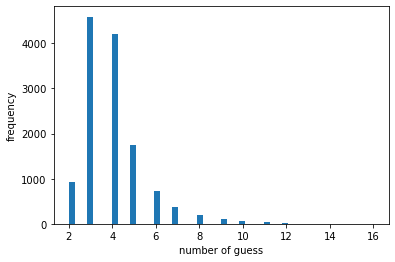

In [48]:
plt.hist(m3, bins=50)
plt.xlabel('number of guess')
plt.ylabel('frequency')

In [49]:
qualified = [i for i in m3 if i < 7]

len(qualified)/len(m3)

0.9396392229417206